In [1]:
!wget "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CA_eum_csv.zip"
!unzip Censo2020_CA_eum_csv.zip Personas00.CSV

--2025-06-18 08:51:44--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CA_eum_csv.zip
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 486238463 (464M) [application/x-zip-compressed]
Saving to: ‘Censo2020_CA_eum_csv.zip’

Censo2020_CA_eum_cs 100%[===================>] 463.71M  7.53MB/s    in 53s     

2025-06-18 08:52:37 (8.76 MB/s) - ‘Censo2020_CA_eum_csv.zip’ saved [486238463/486238463]

Archive:  Censo2020_CA_eum_csv.zip
  inflating: Personas00.CSV          


In [37]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os

In [2]:
df = pd.read_csv('Personas00.CSV')
df.head()

,ENT,MUN,LOC50K,ID_VIV,ID_PERSONA,COBERTURA,ESTRATO,UPM,FACTOR,CLAVIVP,...,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,IDENT_HIJO,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,EDAD_MORIR_TD,TAMLOC
0,1,1,1,10010000001,1001000000100001,2,01-001-0001-00,1,59,1,...,2.0,9.0,2001.0,1.0,3.0,NaN,NaN,NaN,NaN,5
1,1,1,1,10010000001,1001000000100002,2,01-001-0001-00,1,59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1,1,1,10010000001,1001000000100003,2,01-001-0001-00,1,59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,1,1,1,10010000002,1001000000200001,2,01-001-0001-00,1,59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,1,1,1,10010000002,1001000000200002,2,01-001-0001-00,1,59,1,...,2.0,5.0,2009.0,1.0,4.0,NaN,NaN,NaN,NaN,5


In [3]:
columnas = ['ENT', 'MUN','EDAD', 'QDIALECT_INALI', 'HLENGUA', 'FACTOR']
muestra = df[columnas].copy()
muestra.head()

,ENT,MUN,EDAD,QDIALECT_INALI,HLENGUA,FACTOR
0,1,1,55,NaN,3.0,59
1,1,1,18,NaN,3.0,59
2,1,1,21,NaN,3.0,59
3,1,1,45,NaN,3.0,59
4,1,1,42,NaN,3.0,59


In [64]:
entidades_mun = muestra.groupby(['ENT',"MUN"])['FACTOR'].sum().reset_index()
entidades_mun = entidades_mun.rename(columns={'FACTOR': 'Total_pop_MUN'})
entidades_mun

,ENT,MUN,Total_pop_MUN
0,1,1,945506
1,1,2,51474
2,1,3,58155
3,1,4,16997
4,1,5,129859
...,...,...,...
2464,32,54,19444
2465,32,55,31420
2466,32,56,147845
2467,32,57,20449


In [4]:
entidades = muestra.groupby(['ENT'])['FACTOR'].sum().reset_index()
entidades = entidades.rename(columns={'FACTOR': 'Total'})
entidades

,ENT,Total
0,1,1421198
1,2,3739797
2,3,793424
3,4,926858
4,5,3137032
5,6,728300
6,7,5524506
7,8,3725058
8,9,9159393
9,10,1821279


In [5]:
universo = muestra[(muestra['EDAD'] >= 3) & (muestra['EDAD'] <= 130) & (muestra['HLENGUA'] == 1)]
universo.head()

,ENT,MUN,EDAD,QDIALECT_INALI,HLENGUA,FACTOR
819,1,1,28,602.0,1.0,60
1297,1,1,18,211.0,1.0,68
1920,1,1,40,516.0,1.0,58
2024,1,1,24,211.0,1.0,72
3245,1,1,72,211.0,1.0,62


In [6]:
lenguas = universo.groupby(['ENT', 'MUN', 'QDIALECT_INALI'])['FACTOR'].sum().reset_index()
lenguas = lenguas.rename(columns={'FACTOR': 'Total'})
lenguas.head()

,ENT,MUN,QDIALECT_INALI,Total
0,1,1,205.0,140
1,1,1,210.0,59
2,1,1,211.0,789
3,1,1,501.0,119
4,1,1,502.0,354


In [7]:
lenguas['ENT'] = lenguas['ENT'].astype(str).str.zfill(2)
lenguas['MUN'] = lenguas['MUN'].astype(str).str.zfill(3)
lenguas['QDIALECT_INALI'] = lenguas['QDIALECT_INALI'].astype(int).astype(str).str.zfill(4)
lenguas.head()

,ENT,MUN,QDIALECT_INALI,Total
0,01,001,0205,140
1,01,001,0210,59
2,01,001,0211,789
3,01,001,0501,119
4,01,001,0502,354


In [10]:
!wget https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_clasificaciones_CPV.xlsx

--2025-06-18 08:59:34--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_clasificaciones_CPV.xlsx
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210951 (206K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Censo2020_clasificaciones_CPV.xlsx’

Censo2020_clasifica 100%[===================>] 206.01K  --.-KB/s    in 0.08s   

2025-06-18 08:59:34 (2.45 MB/s) - ‘Censo2020_clasificaciones_CPV.xlsx’ saved [210951/210951]



In [29]:
catalogo_inali = pd.read_excel('Censo2020_clasificaciones_CPV.xlsx',
                               sheet_name='Lengua indigena (INALI)', header=1)
catalogo_inali = catalogo_inali.rename(columns={'Agrupación lingüistica\n(Clave)': 'Clave'})
with pd.option_context("display.max_rows", 100):
    display(catalogo_inali)

,Clave,Descripción,Unnamed: 2
0,101,Kickapoo,NaN
1,201,Pápago,NaN
2,202,Pima,NaN
3,203,Tepehuano del norte,NaN
4,204,Tepehuano del sur,NaN
5,205,Tarahumara,NaN
6,206,Guarijío,NaN
7,207,Yaqui,NaN
8,208,Mayo,NaN
9,209,Cora,NaN


In [80]:
colors=[]
families=[]

famcataloge=[
    ('Álgica',"#894544"),
    ('Yuto-nahua',"#267300"),
    ("Cochimí-yumana","#98E501"),
    ("Seri","#A80000"),
    ("Oto-mangue","#FF7F7E"),
    ("Maya","#E0A90E"),
    ("Totonaco-tepehua","#E54C00"),
    ("Tarasca","#002573"),
    ("Mixe-zoque","#005BEC"),
    ("Chontal-oaxaca","#01C5FF"),
    ("Huave","#8401A9"),
    ("Otras latinamérica","#008080"),
    ("No especificado","#000000")
]

for ix, row in catalogo_inali.iterrows():
    clave=int(row['Clave'])
    if clave >= 100 and clave < 200:
        families.append(famcataloge[0][0])
        colors.append(famcataloge[0][1])
    elif clave >=200 and clave < 300:
        families.append(famcataloge[1][0])
        colors.append(famcataloge[1][1])
    elif clave >=300 and clave < 400:
        families.append(famcataloge[2][0])
        colors.append(famcataloge[2][1])
    elif clave >=400 and clave < 500:
        families.append(famcataloge[3][0])
        colors.append(famcataloge[3][1])
    elif clave >=500 and clave < 600:
        families.append(famcataloge[4][0])
        colors.append(famcataloge[4][1])
    elif clave >=600 and clave < 700:
        families.append(famcataloge[5][0])
        colors.append(famcataloge[5][1])
    elif clave >=700 and clave < 800:
        families.append(famcataloge[6][0])
        colors.append(famcataloge[6][1])
    elif clave >=800 and clave < 900:
        families.append(famcataloge[7][0])
        colors.append(famcataloge[7][1])
    elif clave >=900 and clave < 1000:
        families.append(famcataloge[8][0])
        colors.append(famcataloge[8][1])
    elif clave >=1000 and clave < 1100:
        families.append(famcataloge[9][0])
        colors.append(famcataloge[9][1])
    elif clave >=1100 and clave < 1200:
        families.append(famcataloge[10][0])
        colors.append(famcataloge[10][1])
    elif clave >=8000 and clave < 9000:
        families.append(famcataloge[11][0])
        colors.append(famcataloge[11][1])
    elif clave >=9000 and clave < 10000:
        families.append(famcataloge[12][0])
        colors.append(famcataloge[12][1])
        
catalogo_inali["familia"]=families
catalogo_inali["familia_color"]=colors

In [81]:
catalogo_inali['Clave'] = catalogo_inali['Clave'].astype(str).str.zfill(4)
catalogo_inali

,Clave,Descripción,Unnamed: 2,familia,familia_color
0,0101,Kickapoo,NaN,Álgica,#894544
1,0201,Pápago,NaN,Yuto-nahua,#267300
2,0202,Pima,NaN,Yuto-nahua,#267300
3,0203,Tepehuano del norte,NaN,Yuto-nahua,#267300
4,0204,Tepehuano del sur,NaN,Yuto-nahua,#267300
...,...,...,...,...,...
67,8000,Otras lenguas indígenas de América,NaN,Otras latinamérica,#008080
68,9000,No especificado,NaN,No especificado,#000000
69,9010,Chontal insuficientemente especificado,NaN,No especificado,#000000
70,9020,Tepehuano insuficientemente especificado,NaN,No especificado,#000000


In [82]:
nombre_lenguas = pd.merge(
    lenguas, catalogo_inali,
    left_on='QDIALECT_INALI',
    right_on='Clave',
    how='left')

nombre_lenguas['ENT'] = pd.to_numeric(nombre_lenguas['ENT'])
nombre_lenguas['MUN'] = pd.to_numeric(nombre_lenguas['MUN'])
nombre_lenguas=pd.merge(nombre_lenguas,entidades_mun,on=["ENT","MUN"])
nombre_lenguas

,ENT,MUN,QDIALECT_INALI,Total,Clave,Descripción,Unnamed: 2,familia,familia_color,Total_pop_MUN
0,1,1,0205,140,0205,Tarahumara,NaN,Yuto-nahua,#267300,945506
1,1,1,0210,59,0210,Huichol,NaN,Yuto-nahua,#267300,945506
2,1,1,0211,789,0211,Náhuatl,NaN,Yuto-nahua,#267300,945506
3,1,1,0501,119,0501,Otomí,NaN,Oto-mangue,#FF7F7E,945506
4,1,1,0502,354,0502,Mazahua,NaN,Oto-mangue,#FF7F7E,945506
...,...,...,...,...,...,...,...,...,...,...
15038,32,57,0501,4,0501,Otomí,NaN,Oto-mangue,#FF7F7E,20449
15039,32,57,0507,3,0507,Chinanteco,NaN,Oto-mangue,#FF7F7E,20449
15040,32,57,0513,7,0513,Zapoteco,NaN,Oto-mangue,#FF7F7E,20449
15041,32,58,0210,3,0210,Huichol,NaN,Yuto-nahua,#267300,2768


In [83]:
!wget https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/889463807469_s.zip

--2025-06-25 08:23:12--  https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/889463807469_s.zip
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3106988366 (2.9G) [application/x-zip-compressed]
Saving to: ‘889463807469_s.zip’

889463807469_s.zip    1%[                    ]  47.62M  9.06MB/s    eta 6m 24s ^C


In [19]:
!mkdir data
!mv 889463807469_s.zip data
!cd data; unzip 889463807469_s.zip

mkdir: cannot create directory ‘data’: File exists
mv: cannot stat '889463807469_s.zip': No such file or directory
Archive:  889463807469_s.zip
 extracting: 01_aguascalientes.zip   
 extracting: 02_bajacalifornia.zip   
 extracting: 03_bajacaliforniasur.zip  
 extracting: 04_campeche.zip         
 extracting: 05_coahuiladezaragoza.zip  
 extracting: 06_colima.zip           
 extracting: 07_chiapas.zip          
 extracting: 08_chihuahua.zip        
 extracting: 09_ciudaddemexico.zip   
 extracting: 10_durango.zip          
 extracting: 11_guanajuato.zip       
 extracting: 12_guerrero.zip         
 extracting: 13_hidalgo.zip          
 extracting: 14_jalisco.zip          
 extracting: 15_mexico.zip           
 extracting: 16_michoacandeocampo.zip  
 extracting: 17_morelos.zip          
 extracting: 18_nayarit.zip          
 extracting: 19_nuevoleon.zip        
 extracting: 20_oaxaca.zip           
 extracting: 21_puebla.zip           
 extracting: 22_queretaro.zip        
 extracting: 

In [84]:
extract_to="."
for filename in os.listdir('data'):
    try:
        a=int(filename[0:2])
        target_file=f"conjunto_de_datos/{filename[0:2]}mun.shp"
        with zipfile.ZipFile(os.path.join('data',filename), 'r') as zip_ref:
            if target_file in zip_ref.namelist():
                zip_ref.extract(target_file, path=extract_to)
                print(f"{target_file} extracted to {extract_to}")
            else:
                print(f"{target_file} not found in {zip_path}")
    except:
        pass
    try:
        a=int(filename[0:2])
        target_file=f"conjunto_de_datos/{filename[0:2]}mun.shx"
        with zipfile.ZipFile(os.path.join('data',filename), 'r') as zip_ref:
            if target_file in zip_ref.namelist():
                zip_ref.extract(target_file, path=extract_to)
                print(f"{target_file} extracted to {extract_to}")
            else:
                print(f"{target_file} not found in {zip_path}")
    except:
        pass

conjunto_de_datos/27mun.shp extracted to .
conjunto_de_datos/27mun.shx extracted to .
conjunto_de_datos/17mun.shp extracted to .
conjunto_de_datos/17mun.shx extracted to .
conjunto_de_datos/07mun.shp extracted to .
conjunto_de_datos/07mun.shx extracted to .
conjunto_de_datos/10mun.shp extracted to .
conjunto_de_datos/10mun.shx extracted to .
conjunto_de_datos/24mun.shp extracted to .
conjunto_de_datos/24mun.shx extracted to .
conjunto_de_datos/16mun.shp extracted to .
conjunto_de_datos/16mun.shx extracted to .
conjunto_de_datos/09mun.shp extracted to .
conjunto_de_datos/09mun.shx extracted to .
conjunto_de_datos/03mun.shp extracted to .
conjunto_de_datos/03mun.shx extracted to .
conjunto_de_datos/12mun.shp extracted to .
conjunto_de_datos/12mun.shx extracted to .
conjunto_de_datos/01mun.shp extracted to .
conjunto_de_datos/01mun.shx extracted to .
conjunto_de_datos/02mun.shp extracted to .
conjunto_de_datos/02mun.shx extracted to .
conjunto_de_datos/25mun.shp extracted to .
conjunto_de

In [85]:
#!cd data; unzip 01_aguascalientes.zip catalogos/municipios.csv
!cd data; unzip -l 01_aguascalientes.zip

Archive:  01_aguascalientes.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   350560  2021-01-12 13:30   catalogos/contenido.pdf
    10596  2021-01-12 13:30   catalogos/contenido.txt
      635  2021-01-21 12:16   catalogos/entidades_federativas.csv
   425956  2021-01-21 12:16   catalogos/entidades_federativas.pdf
   137250  2021-01-21 12:16   catalogos/lВeme.pdf
     7144  2021-01-21 12:16   catalogos/lВeme.txt
    23504  2021-01-21 12:16   catalogos/localidades_islas.csv
   723177  2021-01-21 12:16   catalogos/localidades_islas.pdf
   129017  2021-01-21 12:16   catalogos/localidades_rurales_que_rebasan_AGEB.csv
  2305599  2021-01-21 12:16   catalogos/localidades_rurales_que_rebasan_AGEB.pdf
    42500  2021-01-21 12:16   catalogos/localidades_rurales_que_rebasan_su_municipio.csv
   858504  2021-01-21 12:16   catalogos/localidades_rurales_que_rebasan_su_municipio.pdf
     3041  2021-01-21 12:16   catalogos/localidades_urbanas_que_rebasan_su_municipio.csv
   45

In [86]:
municipios=pd.read_csv("data/catalogos/municipios.csv",encoding="WINDOWS-1252",sep=";",header=2)
mexico=gpd.read_file("00mun.shp")
mexico=pd.concat([mexico,municipios],axis=1)
mexico = mexico.rename(columns={'Clave de Entidad': 'ENT', 'Clave de Municipio': 'MUN'})
counts = nombre_lenguas.groupby(['ENT', 'MUN']).size().reset_index(name='count')
counts['proportion']=counts['count']/counts['count'].max()
counts['ENT'] = pd.to_numeric(counts['ENT'])
counts['MUN'] = pd.to_numeric(counts['MUN'])
mexico=pd.merge(mexico,counts,on=["ENT","MUN"])
counts =  nombre_lenguas.groupby(['ENT', 'MUN'])['Total'].sum().reset_index()
counts['TotalLog']=np.log10(counts['Total'])
counts['percentage']=counts['TotalLog']/counts['TotalLog'].max()
counts['ENT'] = pd.to_numeric(counts['ENT'])
counts['MUN'] = pd.to_numeric(counts['MUN'])
mexico=pd.merge(mexico,counts,on=["ENT","MUN"])
mexico = mexico.rename(columns={'Total': 'Total_MUN'})
nombre_lenguas['ENT'] = pd.to_numeric(nombre_lenguas['ENT'])
nombre_lenguas['MUN'] = pd.to_numeric(nombre_lenguas['MUN'])
mexico=pd.merge(mexico,nombre_lenguas,on=["ENT","MUN"])
mexico['percentage_pop']=np.log10(mexico['Total'])/np.log10(mexico['Total_pop_MUN'])
mexico

,geometry,ENT,Nombre de Entidad,MUN,Nombre de Municipio,count,proportion,Total_MUN,TotalLog,percentage,QDIALECT_INALI,Total,Clave,Descripción,Unnamed: 2,familia,familia_color,Total_pop_MUN,percentage_pop
0,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1,Aguascalientes,12,0.400000,2084,3.318898,0.629626,0205,140,0205,Tarahumara,NaN,Yuto-nahua,#267300,945506,0.359145
1,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1,Aguascalientes,12,0.400000,2084,3.318898,0.629626,0210,59,0210,Huichol,NaN,Yuto-nahua,#267300,945506,0.296344
2,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1,Aguascalientes,12,0.400000,2084,3.318898,0.629626,0211,789,0211,Náhuatl,NaN,Yuto-nahua,#267300,945506,0.484813
3,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1,Aguascalientes,12,0.400000,2084,3.318898,0.629626,0501,119,0501,Otomí,NaN,Oto-mangue,#FF7F7E,945506,0.347333
4,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1,Aguascalientes,12,0.400000,2084,3.318898,0.629626,0502,354,0502,Mazahua,NaN,Oto-mangue,#FF7F7E,945506,0.426564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15038,"POLYGON ((2421707.751 1202019.971, 2421780.086...",32,Zacatecas,57,Trancoso,4,0.133333,22,1.342423,0.254670,0501,4,0501,Otomí,NaN,Oto-mangue,#FF7F7E,20449,0.139667
15039,"POLYGON ((2421707.751 1202019.971, 2421780.086...",32,Zacatecas,57,Trancoso,4,0.133333,22,1.342423,0.254670,0507,3,0507,Chinanteco,NaN,Oto-mangue,#FF7F7E,20449,0.110684
15040,"POLYGON ((2421707.751 1202019.971, 2421780.086...",32,Zacatecas,57,Trancoso,4,0.133333,22,1.342423,0.254670,0513,7,0513,Zapoteco,NaN,Oto-mangue,#FF7F7E,20449,0.196048
15041,"POLYGON ((2356749.002 1062854.583, 2357430.998...",32,Zacatecas,58,Santa María de la Paz,2,0.066667,5,0.698970,0.132601,0210,3,0210,Huichol,NaN,Yuto-nahua,#267300,2768,0.138611


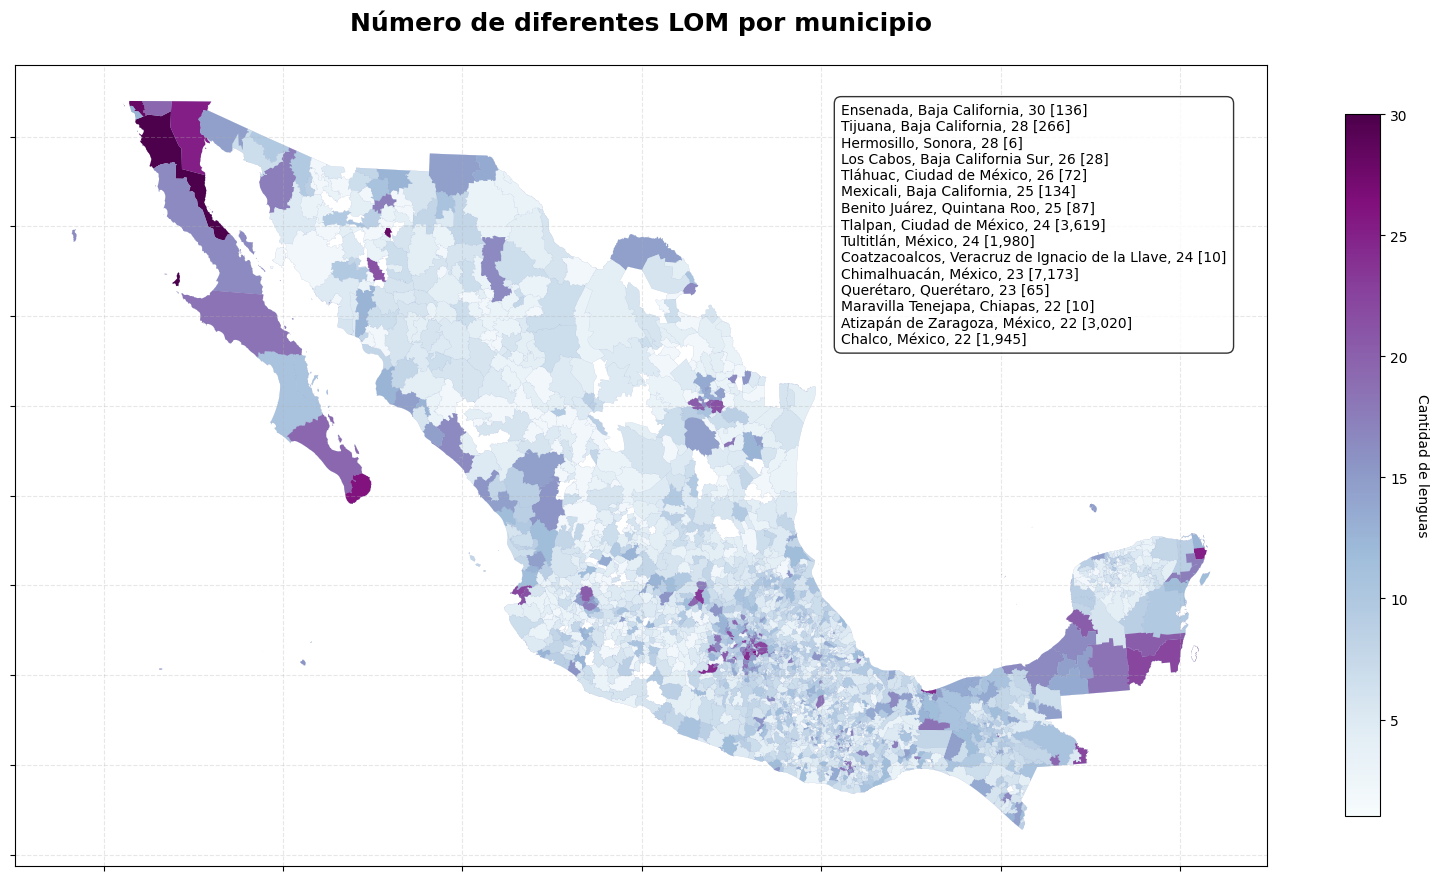

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np
import requests
import zipfile
import matplotlib.colors as mcolors

cmap = plt.cm.BuPu

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

mexico_= mexico.loc[mexico.groupby(['ENT', 'MUN'])['count'].idxmax()]

mexico_.plot(ax=ax, 
           color='lightblue', 
           edgecolor='navy', 
           linewidth=0.1, 
           alpha=0.3)

top_n = mexico_.nlargest(15, 'count')

combined_per_row = top_n.apply(lambda row: f"{row['Nombre de Municipio']}, {row['Nombre de Entidad']}, {row['count']} [{row['Total']:,}]", axis=1)
leyenda_texto = combined_per_row.str.cat(sep='\n')

def alpha2color(x):
    r, g, b, a = cmap(x)
    if  x:
        return f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}{int(a*255):02x}"
    else:
        return "lightblue"

mexico_['color'] = mexico_['proportion'].apply(alpha2color)
    
# Plot Mexico with modern styling
mexico_.plot(ax=ax, 
           color=mexico_['color'], 
           edgecolor='navy', 
           linewidth=0.01)

sm = plt.cm.ScalarMappable(cmap='BuPu', 
                          norm=plt.Normalize(vmin=1, 
                                           vmax=mexico_['count'].max()))
sm.set_array([])
cbar1 = plt.colorbar(sm, ax=ax, shrink=0.6)
cbar1.set_label('Cantidad de lenguas', rotation=270, labelpad=15)

ax.set_title('Número de diferentes LOM por municipio', 
        fontsize=18, fontweight='bold', pad=25)

# Add grid with modern styling
ax.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# Add text directly on the map
ax.text(0.66, 0.80, leyenda_texto, 
        transform=ax.transAxes,  # Use relative coordinates (0-1)
        ha='left',
        va='center',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))


# Tight layout to prevent legend cutoff
plt.tight_layout()
plt.savefig('cantidad_lenguas_municipio.png')

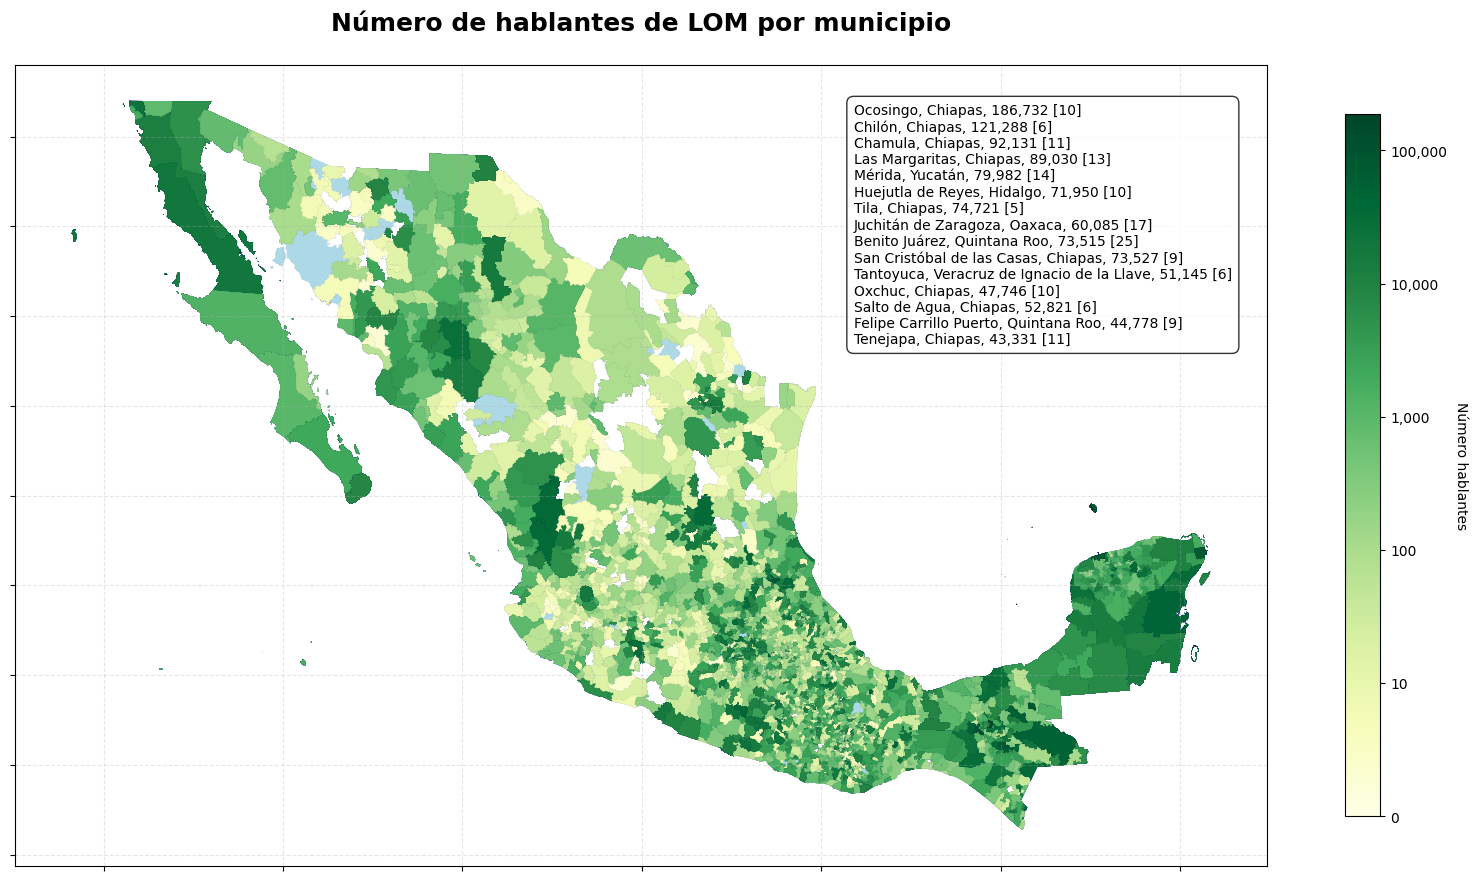

In [88]:
cmap = plt.cm.YlGn

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

mexico_= mexico.loc[mexico.groupby(['ENT', 'MUN'])['Percentage'].idxmax()]

mexico_.plot(ax=ax, 
           color='lightblue', 
           edgecolor='navy', 
           linewidth=0.1, 
           alpha=0.3)

top_n = mexico_.nlargest(15, 'Total')

combined_per_row = top_n.apply(lambda row: f"{row['Nombre de Municipio']}, {row['Nombre de Entidad']}, {row['Total_MUN']:,} [{row['count']}]", axis=1)
leyenda_texto = combined_per_row.str.cat(sep='\n')

def alpha2color(x):
    r, g, b, a = cmap(x)
    if  x:
        return f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}{int(a*255):02x}"
    else:
        return "lightblue"

mexico['color'] = mexico_['percentage'].apply(alpha2color)

# Plot Mexico with modern styling
mexico_.plot(ax=ax, 
           color=mexico['color'], 
           edgecolor='navy', 
           linewidth=0.01)

sm = plt.cm.ScalarMappable(cmap='YlGn', 
                          norm=plt.Normalize(vmin=0, 
                                           vmax=mexico_['TotalLog'].max()))
sm.set_array([])
cbar1 = plt.colorbar(sm, ax=ax, shrink=0.6)
cbar1.set_label('Número hablantes', rotation=270, labelpad=15)

cbar1.set_ticks(np.linspace(0, 5, 6))  # 6 evenly spaced ticks
cbar1.set_ticklabels(['0','10', '100', '1,000', '10,000', '100,000'])

ax.set_title('Número de hablantes de LOM por municipio', 
        fontsize=18, fontweight='bold', pad=25)

# Add grid with modern styling
ax.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# Add text directly on the map
ax.text(0.67, 0.80, leyenda_texto, 
        transform=ax.transAxes,  # Use relative coordinates (0-1)
        ha='left',
        va='center',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Tight layout to prevent legend cutoff
plt.tight_layout()
plt.savefig('logPolulation_lenguas_municipio.png')

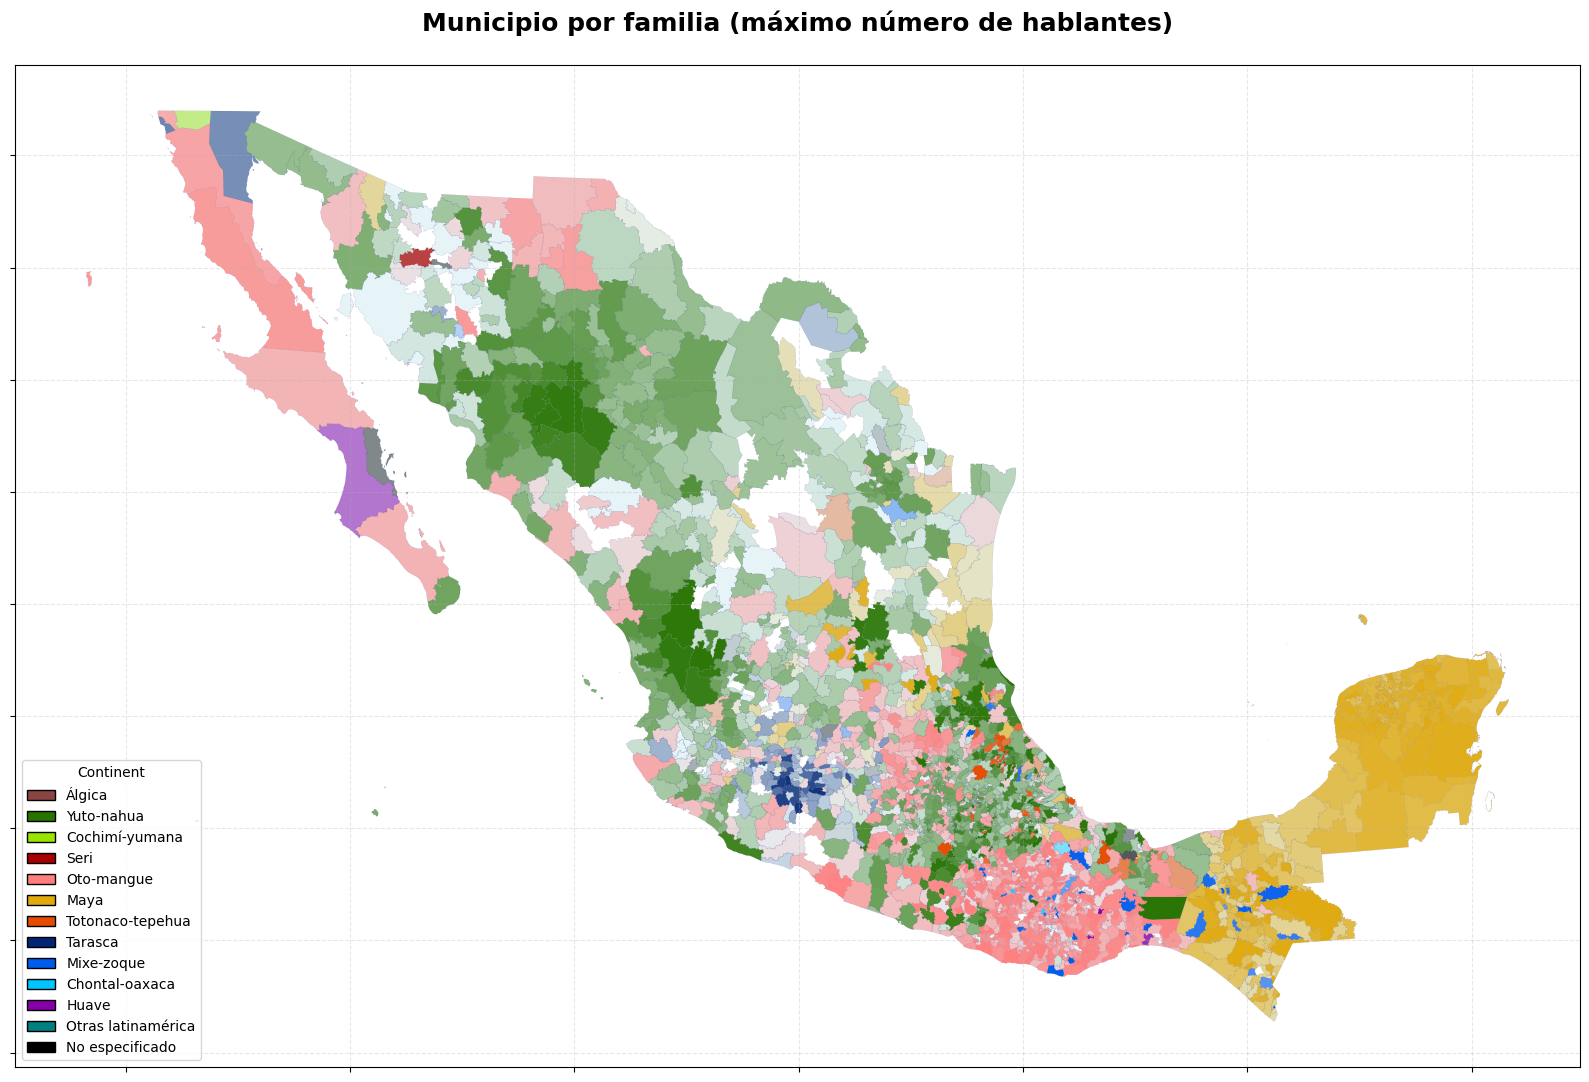

In [89]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

mexico_= mexico.loc[mexico.groupby(['ENT', 'MUN'])['Total'].idxmax()]

mexico_.plot(ax=ax, 
           color='lightblue', 
           edgecolor='navy', 
           linewidth=0.1, 
           alpha=0.3)


def alpha2color(color,per):
    alpha=per*255
    return f"{color}{int(alpha):02x}"
    
mexico_['color'] = mexico_.apply(lambda row: alpha2color(row['familia_color'],row["percentage_pop"]),axis=1)
    

# Plot Mexico with modern styling
mexico_.plot(ax=ax, 
           color=mexico_['color'], 
           edgecolor='navy', 
           linewidth=0.01)

ax.set_title('Municipio por familia (máximo número de hablantes)', 
        fontsize=18, fontweight='bold', pad=25)

# Add grid with modern styling
ax.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# Custom legend: create square patches
legend_elements = [Patch(facecolor=clr, edgecolor='black', label=label)
                   for label, clr in famcataloge]

# Add legend to plot
ax.legend(handles=legend_elements, title="Continent", loc='lower left')

# Tight layout to prevent legend cutoff
plt.tight_layout()
plt.savefig('color_families_municipio.png')